# Introduction to Machine Learning
## Lecture 3 - Clustering
### Notebook 2: Real Life Clustering on A Customer Segmentation Dataset
Prapared by: Said Bolluk

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
%matplotlib inline

# Data Preparation

In [2]:
data = pd.read_csv("../datasets/Cust_Segmentation.csv")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


We will remove the features that cannot provide valuable information for clustering. These are the redundant columns in our dataset.

In [3]:
redundants = ["Customer Id", "Address"]
data = data.drop(columns=redundants)

Check missing values

In [4]:
data.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

Here we should be careful about information loss. The **Defaulted** feature has 150 missing entries. We can discard this column instead of deleting its empty rows because the 150 rows might have valuable information for the other features. However, this column includes information about the debt of the customers. Since we aim to determine the customer profile that will use our bank's services, we might need such information. Therefore, we will only delete the rows with missing entries.

In [5]:
data = data.dropna(axis=0)

In [6]:
data.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

Apply encoding to the categorical variable: Defaulted.

In [7]:
data = pd.get_dummies(data, columns=["Defaulted"])

In [8]:
data.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted_0.0,Defaulted_1.0
0,41,2,6,19,0.124,1.073,6.3,1,0
1,47,1,26,100,4.582,8.218,12.8,1,0
2,33,2,10,57,6.111,5.802,20.9,0,1
3,29,2,4,19,0.681,0.516,6.3,1,0
4,47,1,31,253,9.308,8.908,7.2,1,0


# Clustering

In this study, we aim to create risk groups for the customer by looking at their previous demographic and economic conditions. Later, we can use this model as a decision-making tool when giving loans or credit cards.

In [9]:
# Create a copy of data for the future use
customer_data = data.copy()

In [10]:
X = data.values

Let us say that we want to define three risk categories for the customer: **Low, Moderate, and High Risk**. We can change the number of clusters later, but for now, this is our assumption. We can use these categories to classify our customers using their backgrounds.

In [11]:
n_cluster = 3
k_means = KMeans(n_clusters=n_cluster, random_state=42)

# Train the model
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

Display the cluster centers. We will have three centers since we fit our model using three clusters. Each cluster center has a number of coordinates equal to the number of features in our dataset.

In [12]:
print(k_means.cluster_centers_)

[[4.11032258e+01 1.91612903e+00 1.51354839e+01 8.11225806e+01
  3.02493548e+00 5.60525806e+00 1.08483871e+01 8.19354839e-01
  1.80645161e-01]
 [3.27758945e+01 1.63276836e+00 6.16949153e+00 3.06421846e+01
  1.00379473e+00 2.09090960e+00 1.01468927e+01 7.15630885e-01
  2.84369115e-01]
 [4.47857143e+01 3.00000000e+00 1.78571429e+01 2.19714286e+02
  6.11542857e+00 1.15463571e+01 8.06428571e+00 7.14285714e-01
  2.85714286e-01]]


We can also use the mean of each instance for a specific feature within the cluster to determine the cluster centers.

In [13]:
# Assign cluster labels to instances
labels = k_means.labels_
# Create a column showing the labels of the instances
data["Cluster"] = labels
data.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted_0.0,Defaulted_1.0,Cluster
0,41,2,6,19,0.124,1.073,6.3,1,0,1
1,47,1,26,100,4.582,8.218,12.8,1,0,0
2,33,2,10,57,6.111,5.802,20.9,0,1,0
3,29,2,4,19,0.681,0.516,6.3,1,0,1
4,47,1,31,253,9.308,8.908,7.2,1,0,2


In [14]:
# Display the cluster centers
data.groupby("Cluster").mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted_0.0,Defaulted_1.0
Cluster,,,,,,,,,
0,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,10.848387,0.819355,0.180645
1,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,10.146893,0.715631,0.284369
2,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,8.064286,0.714286,0.285714


Looking at the cluster centers, we can understand what customers constitute a high or low risk. For example, the customers in Cluster-2 are the oldest, have the longest education and working period, and have the highest debt-to-income ratio. We can say that such customers are more likely to pay the debt. Therefore, we can classify them as **Low-Risk** customers. Similarly, we can say that Cluster-1 customers will be **High-Risk**, and the Cluster-0 customers will be **Moderate-Risk** customers. 

# Evaluate The Clustering Performance

Before moving on with a different number of clusters to segment customers, let us now determine the best clustering model using the clustering evaluation metrics, **Silhouette Coefficient and Within-Cluster Sum of Squares (WCSS)**. We will now compare **K-Means Clustering** and **Agglomerative Clustering** using n_clusters=3. After determining the optimal model, we evaluate the model's performance using different clusters. Note that Agglomerative Clustering is a hierarchical clustering algorithm.

In [15]:
# Use the save dataset: customer_data
X = customer_data.values

In [16]:
n_cluster = 3

# Define clustering models with default settings.
# Recall that machine learning models require hyperparameter tuning.
# We will explore that later since it is a highly advanced topic.
k_means = KMeans(n_clusters=n_cluster, random_state=42)
agg = AgglomerativeClustering(n_clusters=n_cluster)

# Train the models
k_means.fit(X)
agg.fit(X)

# Calcualate Silhouette Scores 
score_kmean = silhouette_score(X, k_means.labels_)
score_agg = silhouette_score(X, agg.labels_)

print("Silhouette Score for K-Means Clustering:", np.round(score_kmean, 4))
print("Silhouette Score for Agglomerative Clustering:", np.round(score_agg, 4))

Silhouette Score for K-Means Clustering: 0.5524
Silhouette Score for Agglomerative Clustering: 0.5302


Recall that the Silhouette Score is a value between -1.0 and 1.0. As it approaches 1.0, the clustering becomes ideal. We can see that **K-Means Clustering** performed slightly better than Agglomerative Clustering. Therefore, we continue with this clustering method.

Now, let us determine the optimal number of clusters that identify the risk groups best among the observed customers.

In [17]:
X = customer_data.values

cluster_list = np.arange(2, 11)
sc_list = list()
wcss_list = list()

for n in cluster_list:
    k_means = KMeans(n_clusters=n, random_state=42)
    # Predict the cluster labels
    k_means.fit(X)
    predictions = k_means.labels_
    # Calculate the Rand Index
    sc = silhouette_score(X, predictions)
    sc_list.append(sc)
    wcss = k_means.inertia_
    wcss_list.append(wcss)

(1) Let us examine the Silhouette Scores:

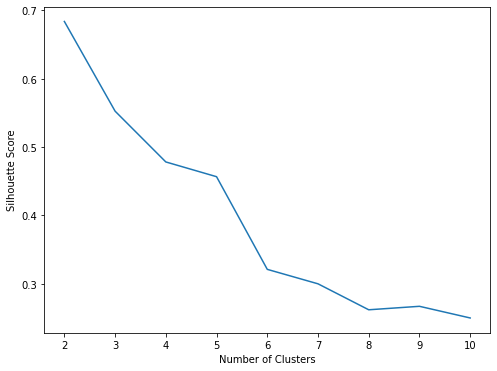

In [18]:
# Visualize results
plt.figure(figsize=(8, 6))
plt.plot(cluster_list, sc_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

We can see that the increasing number of clusters did not improve the clustering performance. However, we should also examine the clusters' variance to decide the optimal cluster numbers better. Therefore, we should check the **Within-Cluster Sum of Squares (WCSS).** This metric might help us detect the optimal point for the cluster numbers as it displays the rapid and stable changes in the variances within clusters.

(2) Within-Cluster Sum of Squares (WCSS)

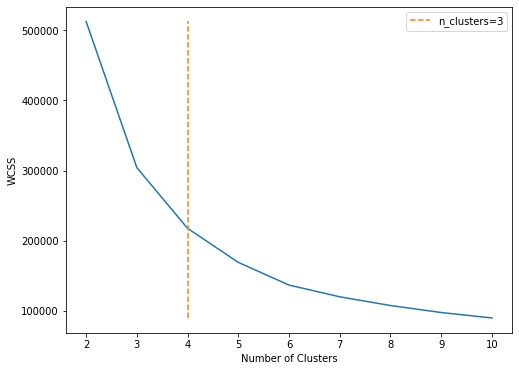

In [19]:
# Visualize results
plt.figure(figsize=(8, 6))
plt.plot(cluster_list, wcss_list)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

# Mark the optimal point
a = [4, 4]
b = [np.min(wcss_list), np.max(wcss_list)]
plt.plot(a, b, linestyle="--", label="n_clusters=3")
plt.legend()

plt.show()

Automatically detect the elbow point

In [20]:
from kneed import KneeLocator
kl = KneeLocator(cluster_list, wcss_list, curve="convex", direction="decreasing")
elbow_point = kl.elbow
print("Elbow point:", elbow_point)

Elbow point: 4


**Discussion:** The elbow points indicate a certain cluster number, after which the reduction in variance slows down. This means that increasing the cluster number after **n_clusters=4** does not improve the efficiency of clustering. We can also see that n_clusters=4 stands in a good position regarding the Silhouette Coefficient. Because, below the elbow point until n_clusters=1, the customer segmentation becomes meaningless. Also, the Silhouette Score drastically decreases after the elbow point, even though the variance also decreases. Therefore, we can say that the customer data should be classified into four (**n_clusters=4**) different risk groups considering the variance within the clusters.

# END